# <font color='navy'> <i><b> STEMFIE-X Library structure</i></b> </font>
<img src="./img/banner_02.png" width="800">

**Stemfie-X** is a set of classes on top of the CadQuery library, which implement elementary objects and operations for working with kit objects.


## <font color='purple'> <b> Library class diagram</b></font>

<img src='./img/lib_stemfie.png' width="800">

## <font color='purple'> <b> Library expansion</b></font>

Of course, it is possible to use all the capabilities of the [CadQuery](https://cadquery.readthedocs.io/en/latest/) library and the Python language. You can extend the library classes by inheriting and adding additional properties.

```Python
# Typical Stemfie-X class, derived from base class Stemfie_X
class Hole(Stemfie_X):                     

     # constructor
    def __init__(self, length=1):  
        Stemfie_X.__init__(self)     

        # some operation over CadQuery stack
        self.obj = self.obj.self.obj.circle(self.Hole_Radius)

        # next operation
        self.obj = self.obj.NEXT_OPERATION 
        ...
```
## <font color='purple'> <b> Usage </b></font>

### <font color='teal'> <b> Copies of objects </b></font>

Using an instance of a class, we create a standard Python reference to an object.
If we want to work with a copy of an object, we need to use the copy operation.


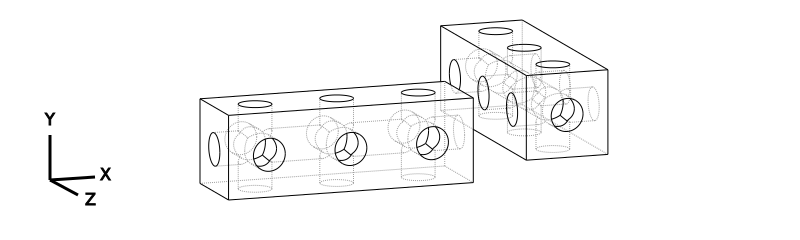

In [2]:
from lib import *

ba = Beam_Block(3)                   
bb = ba.copy()
bb.Ry().BU_Tx(4)

ba.U(bb)     # union for displaying objects together in one image in Jupyter Notebook
display(SVG(ba.obj.toSvg()))

### <font color='teal'> <b> Class inheritance </b></font>

Using class inheritance, you can create your own parametric object classes using all the features of the Stemfie-X library and, of course, CadQuery.

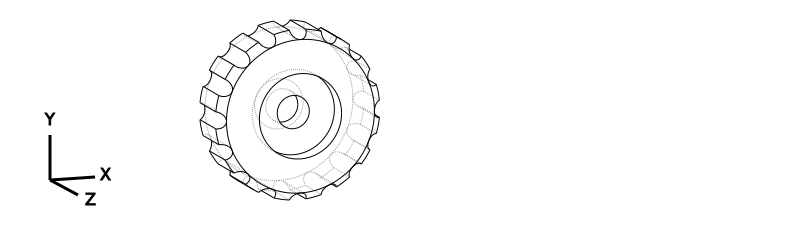

In [2]:
from lib import *
import numpy as np

class Simple_Wheel(Stemfie_X):
    # simple, non parametric class
    def __init__(self):
        # outer cylinder - Stemfie-X object
        w1 = BU_Cylinder(2, 1/2+1/4, hole=True)
        w1.obj= w1.obj.faces().chamfer(1)

        # inner cylinder
        w2 = BU_Cylinder(1, 1/4, hole=True).BU_Tz(1/2-1/4)
        w1.D(w2)

        # tire tread - using CadQuery 
        N = 16                         
        r = 10
        gamma = np.pi*2/N
        ds = cq.Workplane('XY')
        for n in range(N):
            hx = np.cos(gamma*n)*r
            hy = np.sin(gamma*n)*r
            ds = ds.moveTo(hx,hy)
            ds = ds.cylinder(20, 1)
        
        w1.obj = w1.obj.cut(ds)
        self.obj = w1.obj

w = Simple_Wheel()

display(SVG(w.obj.toSvg()))

## <font color='purple'> <b> Export to STEP and STL</b></font>

For further processing and 3D printing, we can export objects using standard [CadQuery](https://cadquery.readthedocs.io/en/latest/importexport.html#exporting-stl) methods to various output formats.

In [4]:
w2 = Simple_Wheel()
_ = w2.export_step('./examples/simple_wheel')
_ = w2.export_stl('./examples/simple_wheel')

<img src="./img/banner_02.png" width="800">